In [1]:
import tensor_to_structure as ttf
import tensor_to_structure.utilities as ttf_utilities
import pickle
import matplotlib.pyplot as plt

RDKit WARNING: [13:18:01] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
with open('data/structs', 'rb') as f:
    ligands = pickle.load(f)

In [3]:
molecules = []
for i, ligand in enumerate(ligands[:12]):
    try:
        molecule = ttf_utilities.rdkit_to_molecule(ligand)
        molecules.append(molecule)
    except ValueError as error:
        print('Bad ligand:', i, error)

Bad ligand: 3 Bad Conformer Id


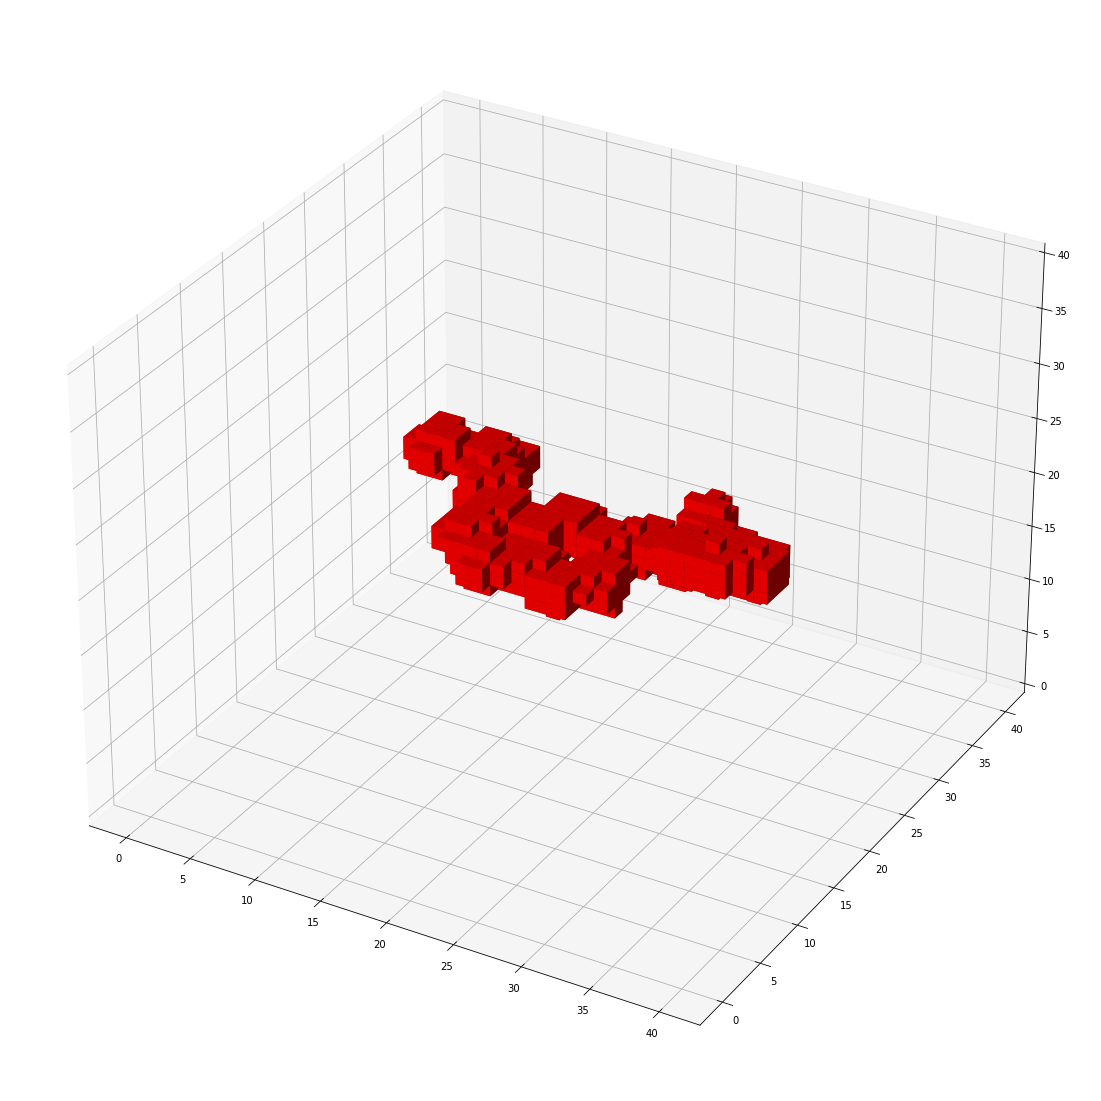

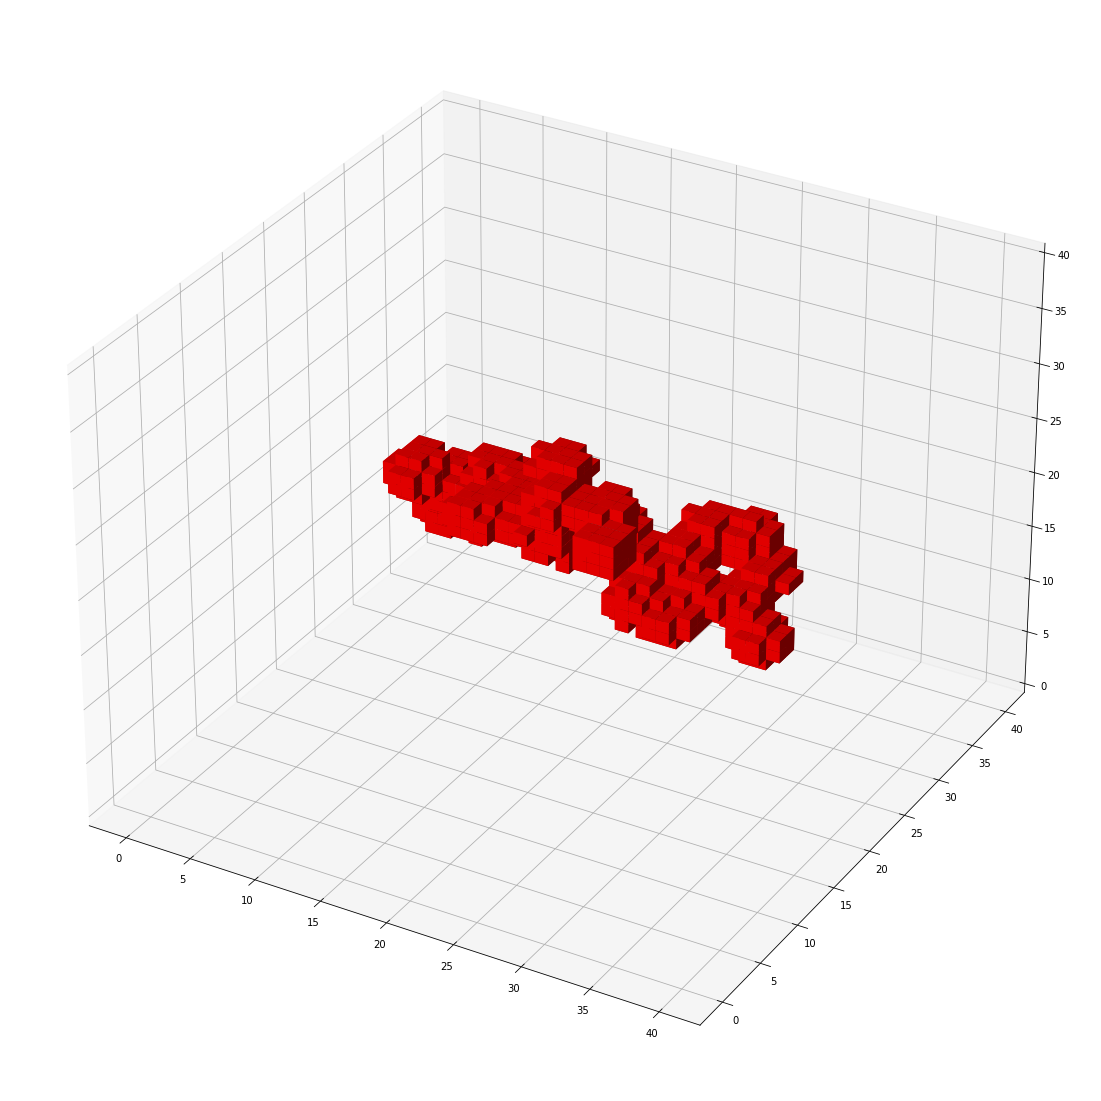

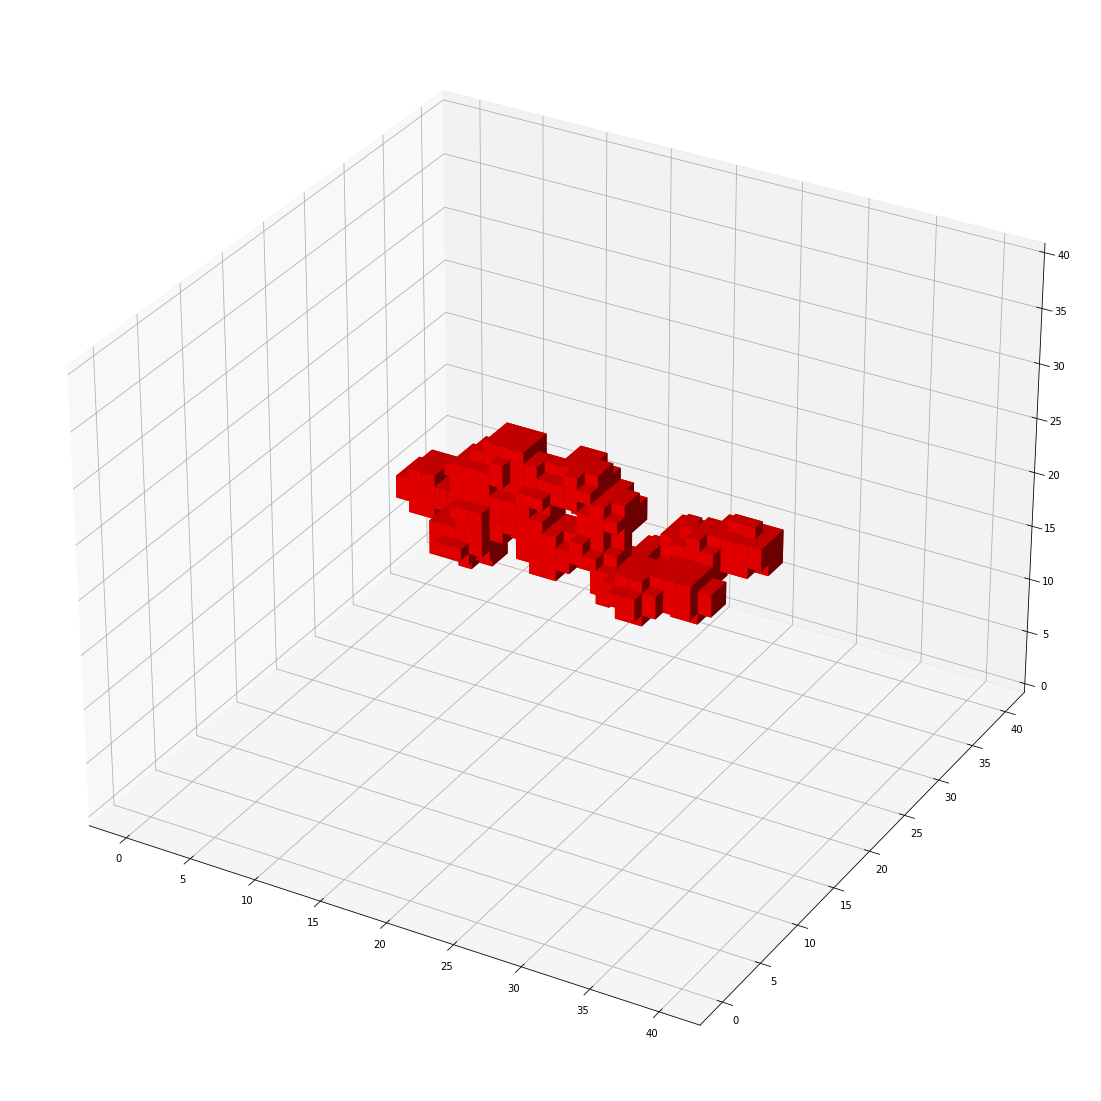

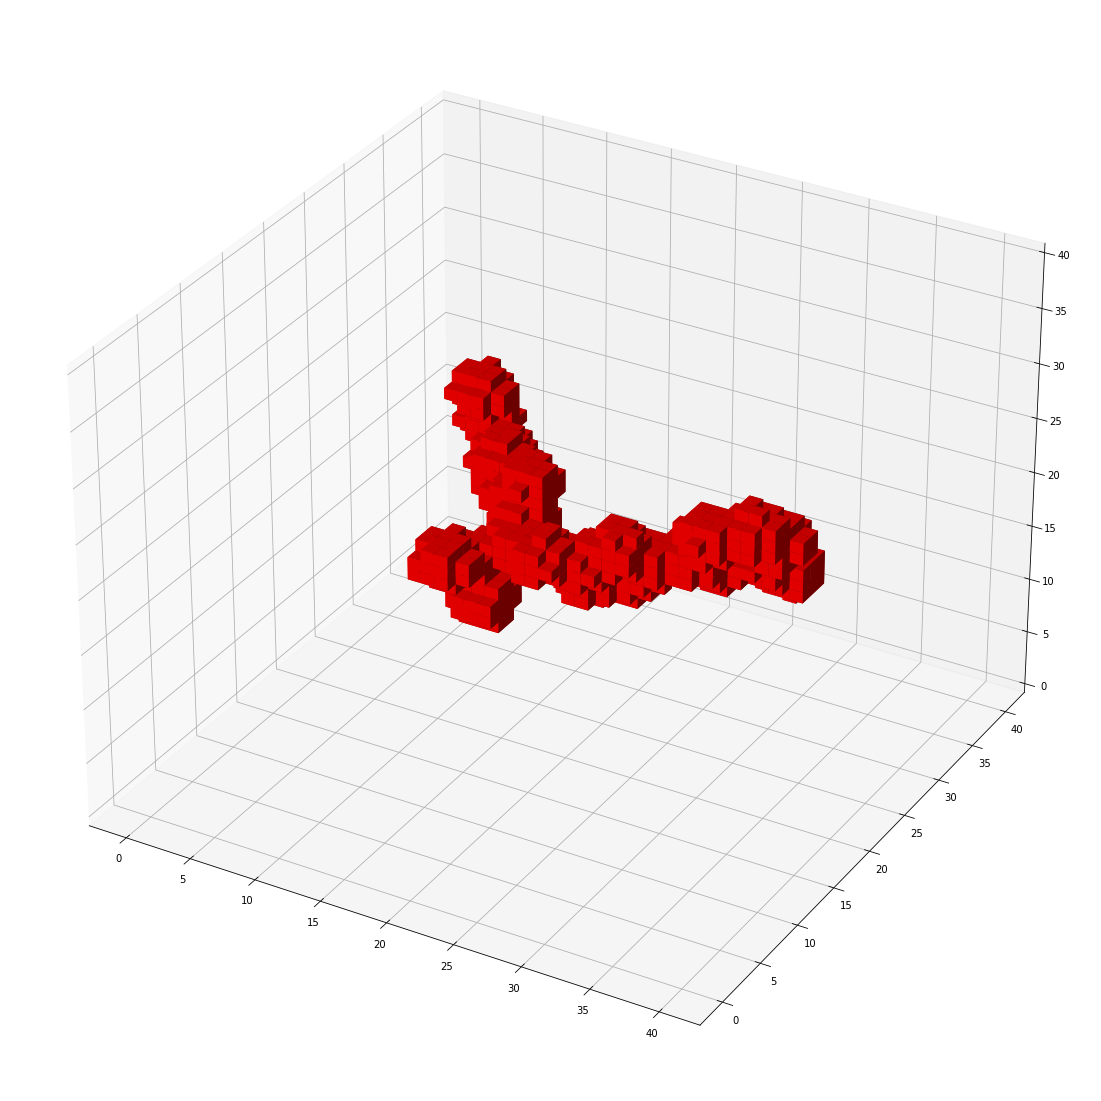

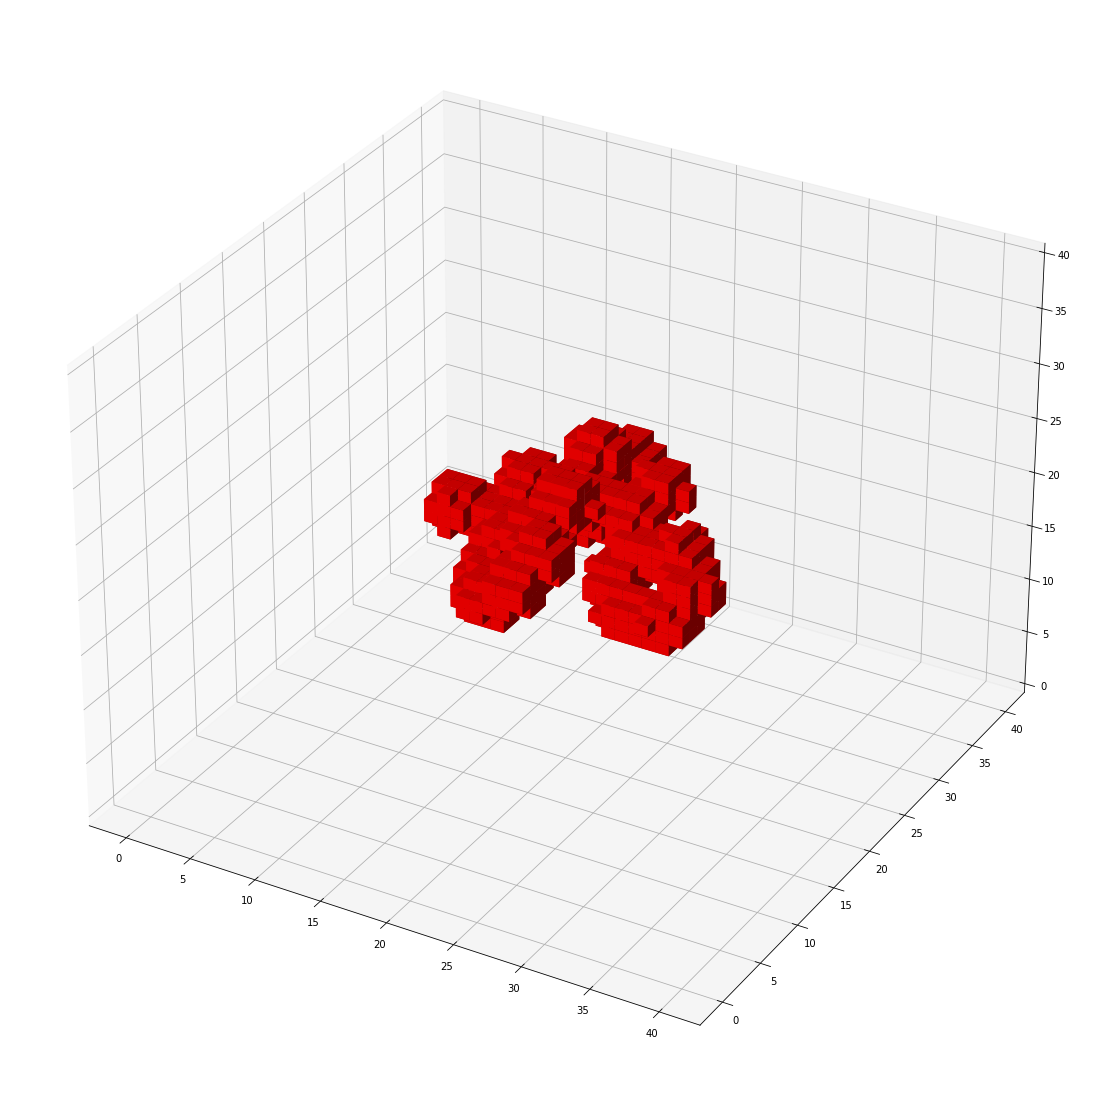

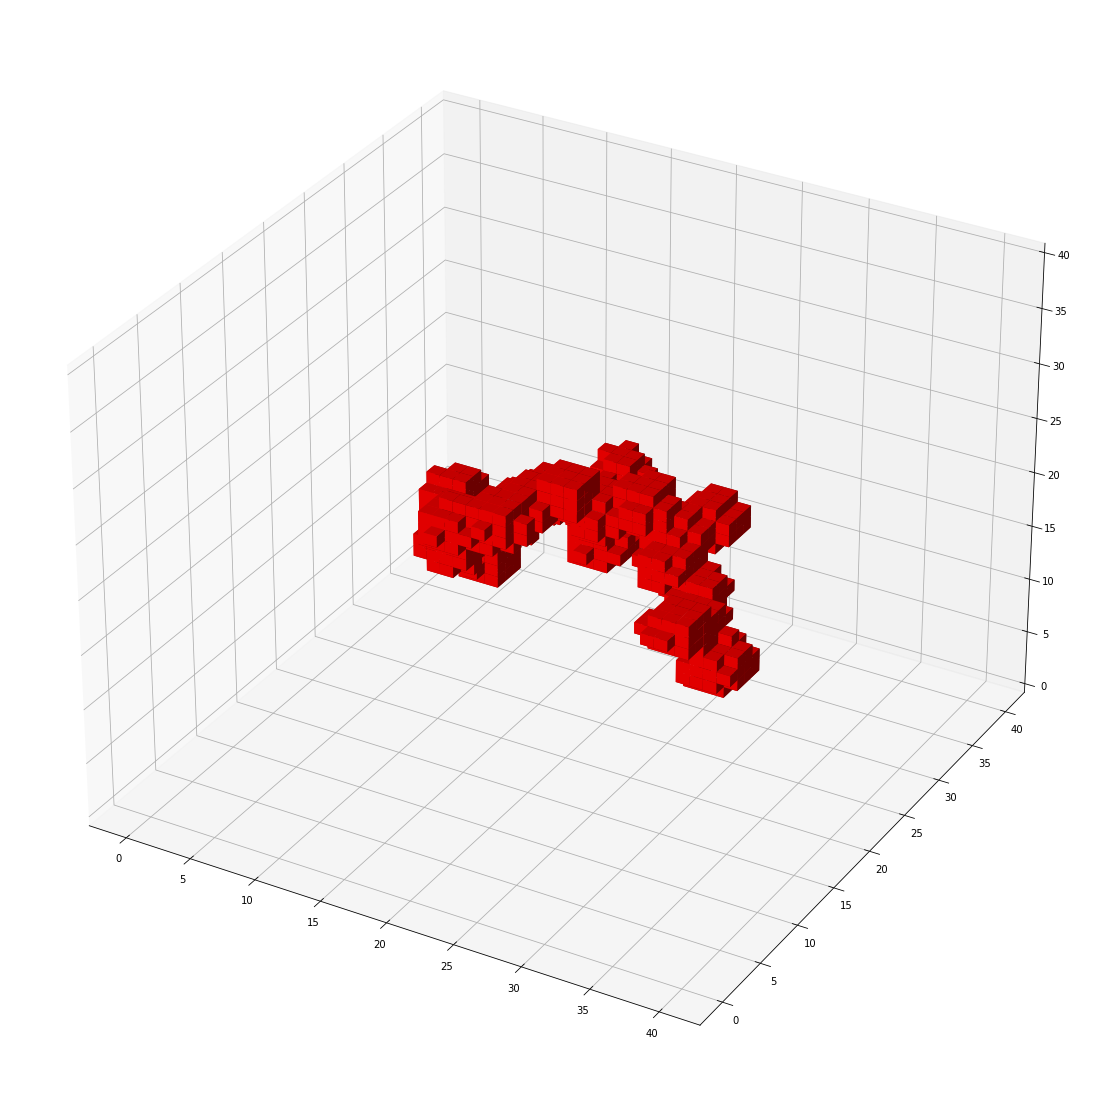

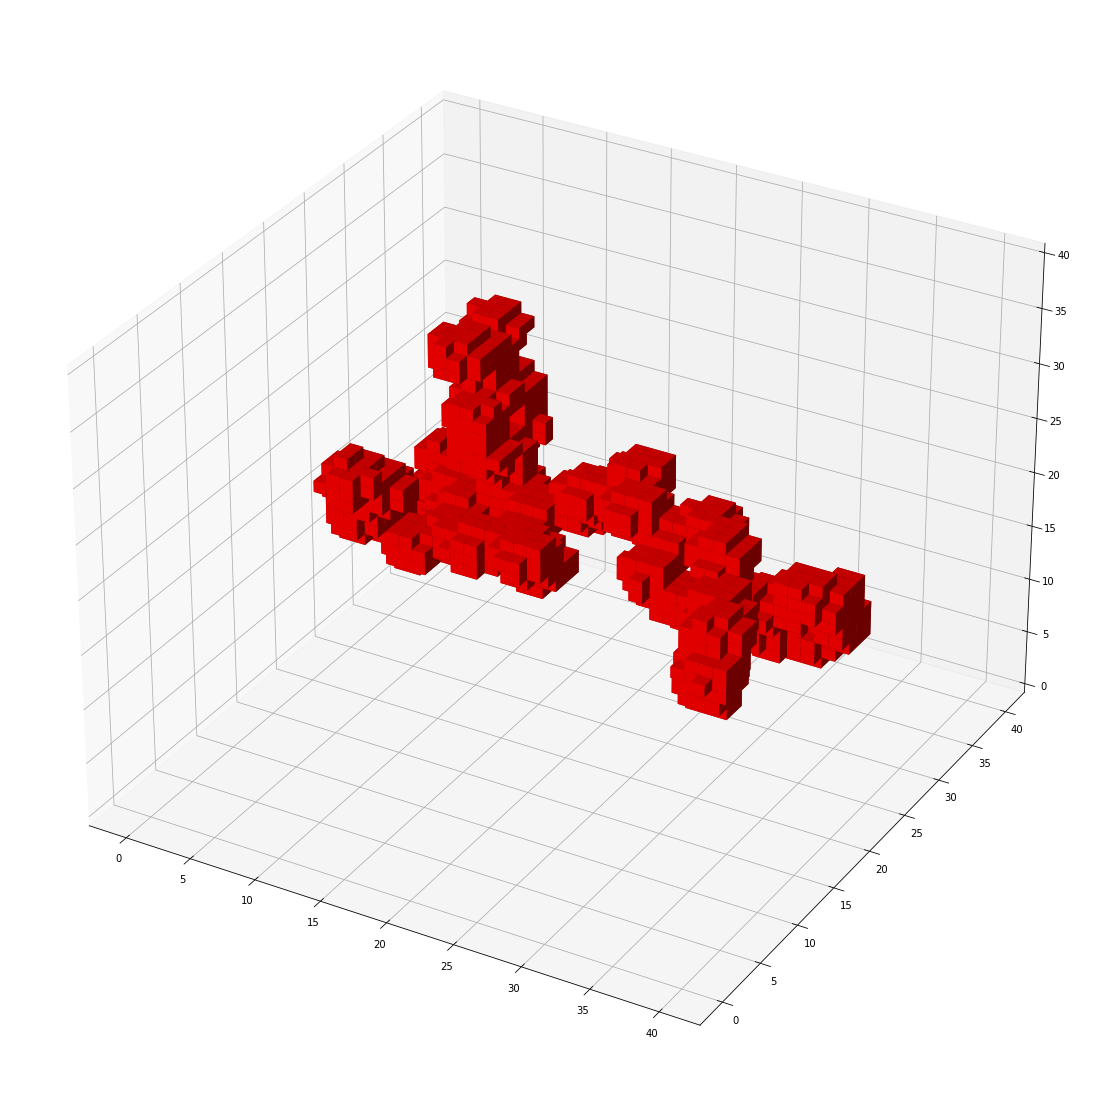

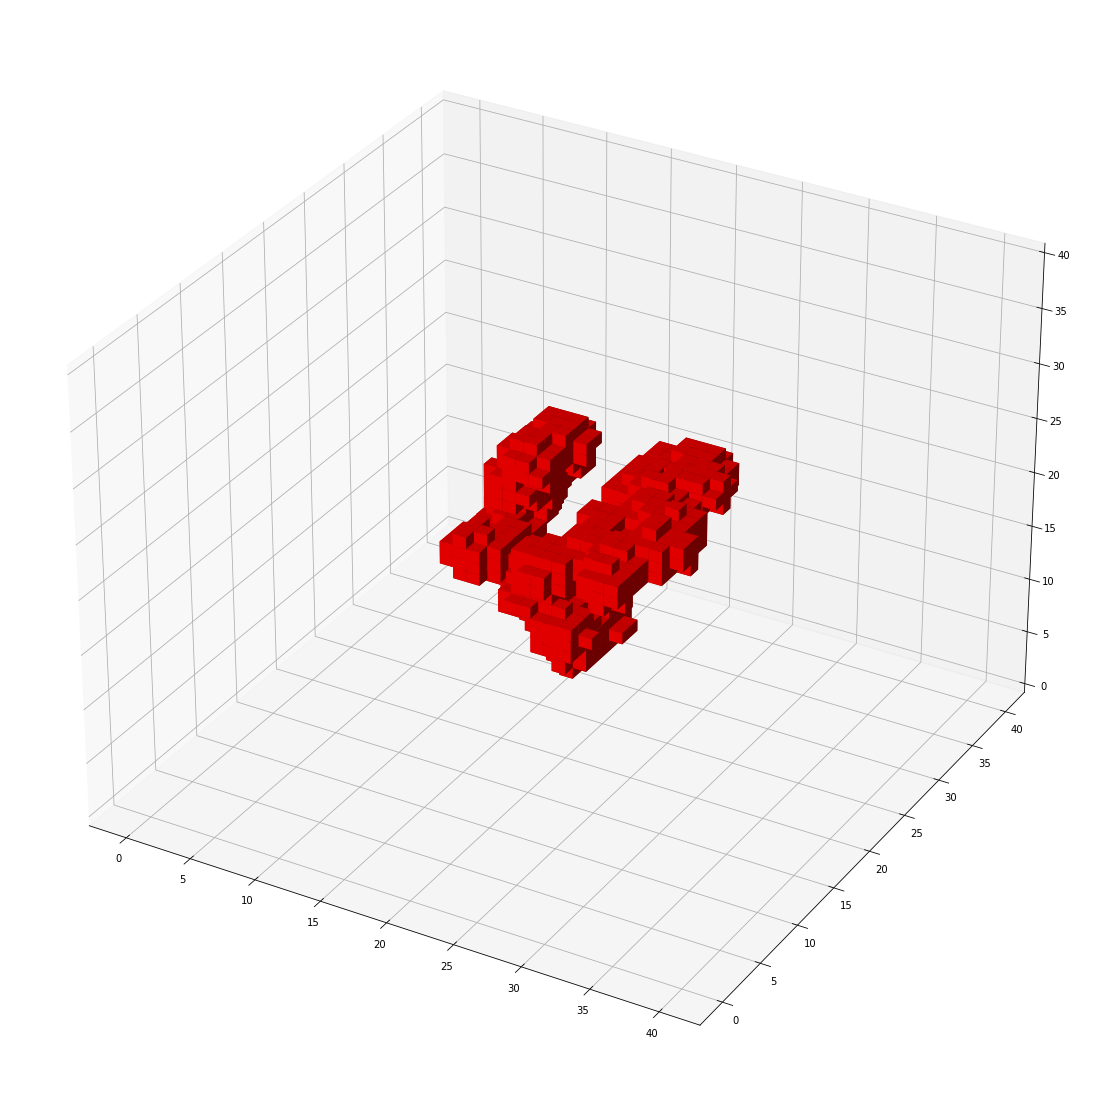

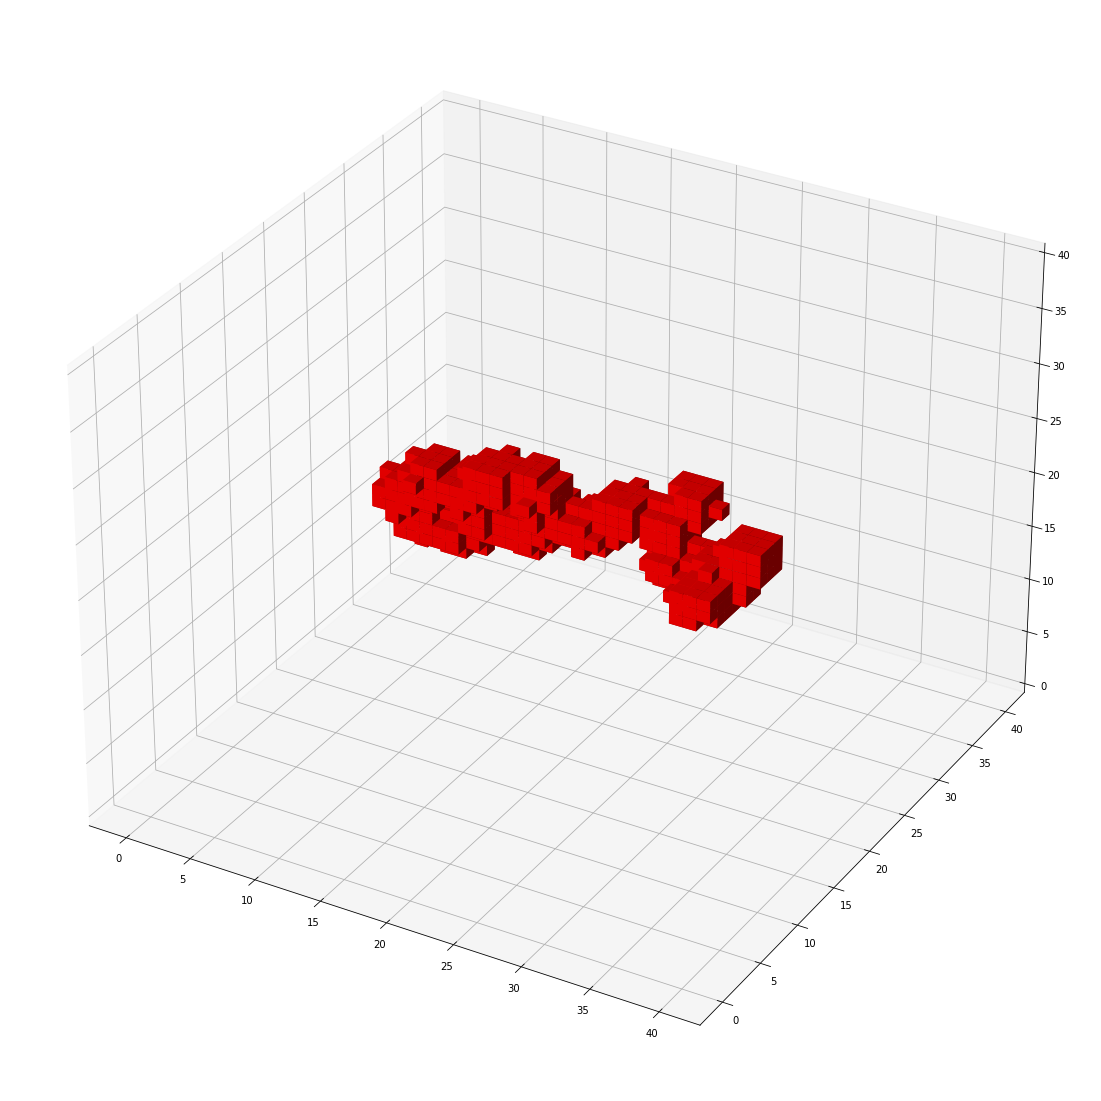

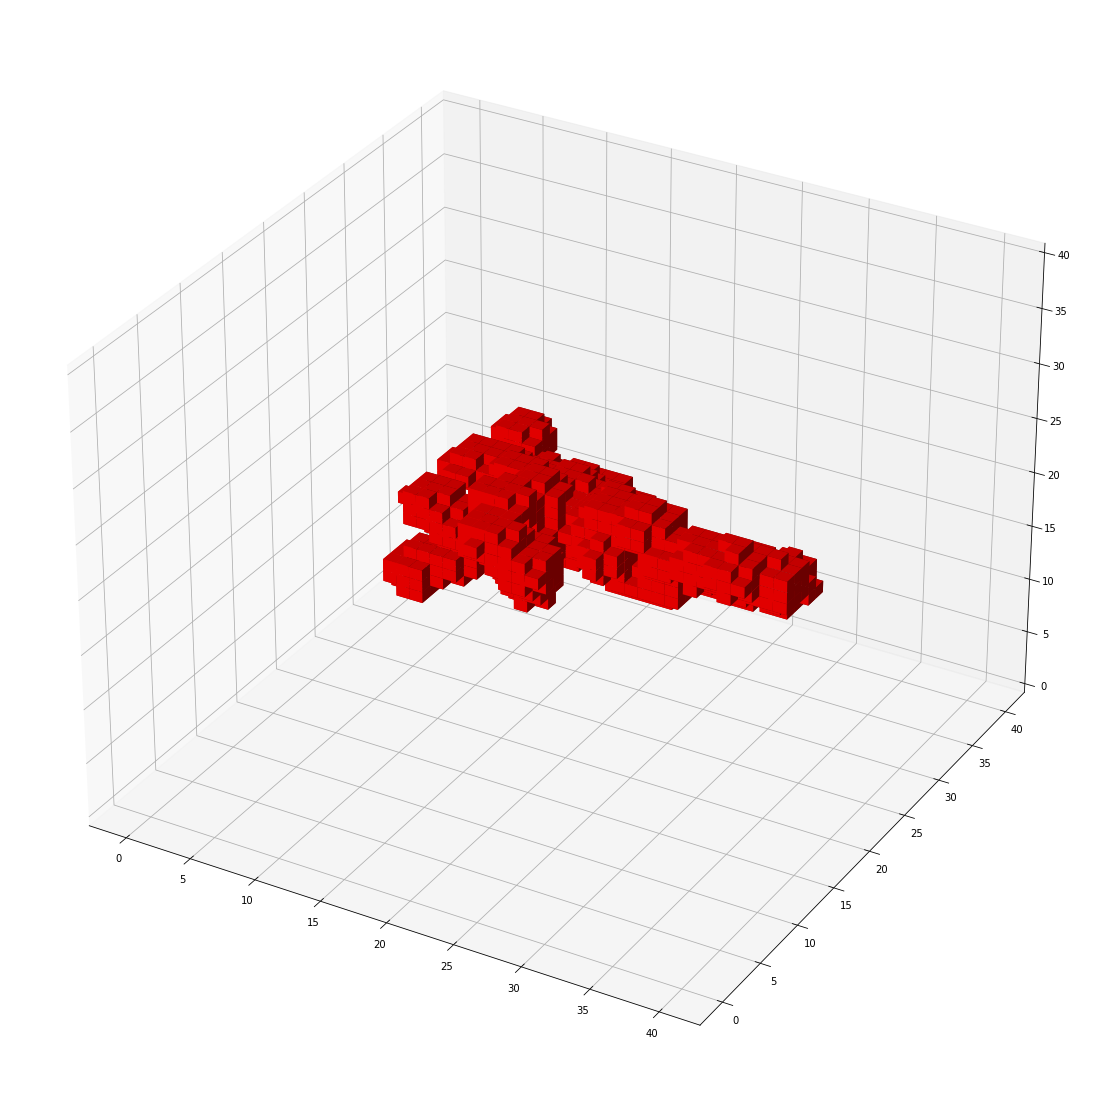

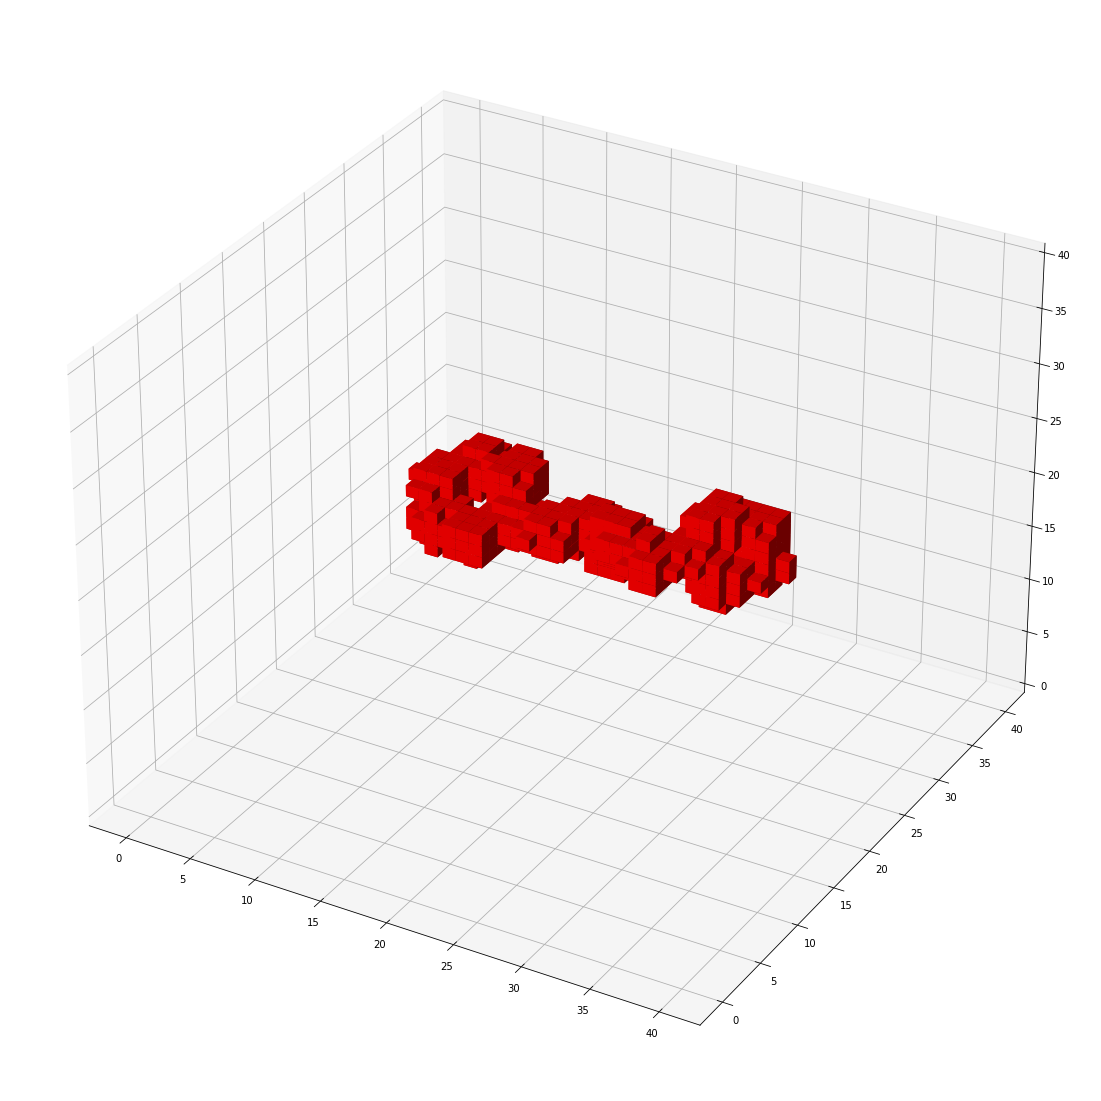

In [5]:
for molecule in molecules:
    ttf_utilities.plot_voxels(ttf_utilities.molecule_to_tensor(molecule))